<a href="https://colab.research.google.com/github/wcjdesingweb/challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Normalizar los datos JSON anidados
df = pd.json_normalize(data)




In [19]:
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [20]:
# Renombrar columnas para mayor claridad
df.rename(columns={
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}, inplace=True)

# Convertir 'TotalCharges' a numérico, forzando errores a NaN
# Los valores vacíos ('') se convertirán a NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Rellenar valores nulos en 'TotalCharges' con 0.
# Esto es una decisión de negocio/análisis: para clientes con tenure muy bajo
# y TotalCharges en blanco, 0 puede ser apropiado.
df['TotalCharges'].fillna(0, inplace=True)

# Convertir 'SeniorCitizen' a tipo 'object' (categórico) para mejor interpretación
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# Convertir la columna 'Churn' a tipo numérico (0 y 1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\n--- Vista Previa del DataFrame Transformado ---")
print(df.head())

print("\n--- Información del DataFrame (Tipos de Datos y No Nulos) ---")
print(df.info())

print("\n--- Conteo de Valores Nulos Después de la Limpieza ---")
print(df.isnull().sum())


--- Vista Previa del DataFrame Transformado ---
   customerID  Churn  Gender SeniorCitizen Partner Dependents  Tenure  \
0  0002-ORFBO      0  Female             0     Yes        Yes       9   
1  0003-MKNFE      0    Male             0      No         No       9   
2  0004-TLHLJ      1    Male             0      No         No       4   
3  0011-IGKFF      1    Male             1     Yes         No      13   
4  0013-EXCHZ      1  Female             1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes       

<ipython-input-20-2b1a6beacfab>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


#📊 Carga y análisis

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



--- Análisis Descriptivo General ---
             Churn       Tenure  MonthlyCharges  TotalCharges
count  7267.000000  7267.000000     7267.000000   7267.000000
mean      0.257190    32.346498       64.720098   2277.182035
std       0.437115    24.571773       30.129572   2268.648587
min       0.000000     0.000000       18.250000      0.000000
25%       0.000000     9.000000       35.425000    396.200000
50%       0.000000    29.000000       70.300000   1389.200000
75%       1.000000    55.000000       89.875000   3778.525000
max       1.000000    72.000000      118.750000   8684.800000

--- Distribución de la Variable Objetivo (Churn) ---
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

--- Tasa de Churn por Variables Categóricas ---

Análisis para: Gender
Gender
Female    0.261414
Male      0.253061
Name: Churn, dtype: float64


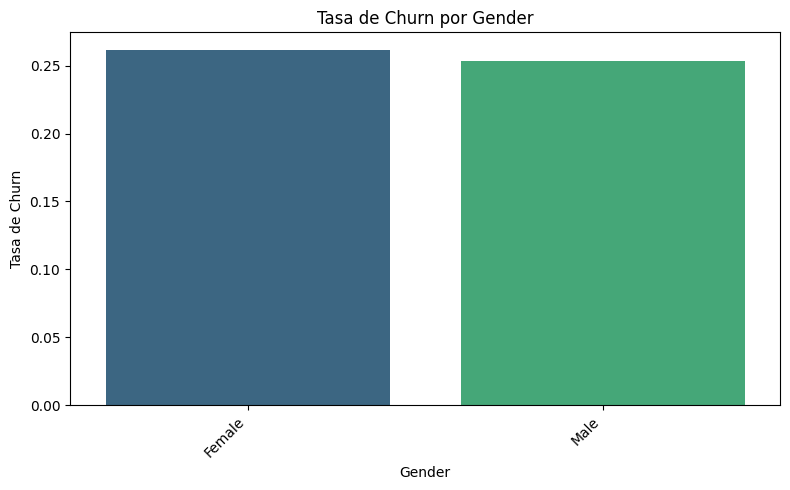


Análisis para: SeniorCitizen
SeniorCitizen
1    0.402707
0    0.228924
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


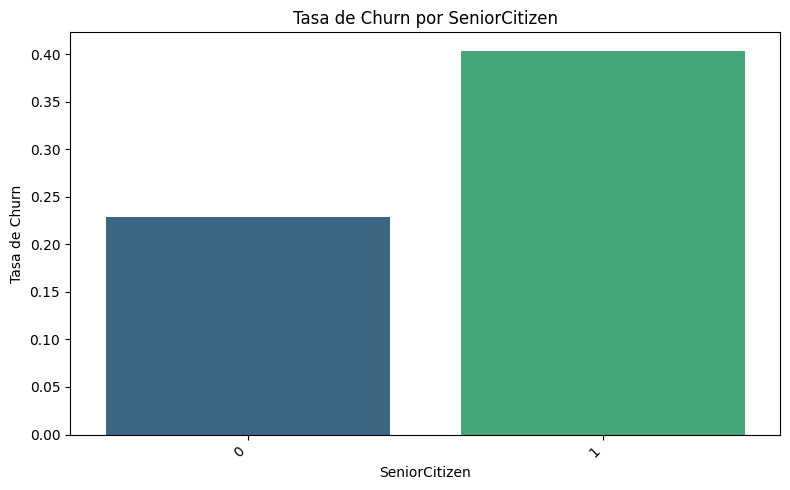


Análisis para: Partner
Partner
No     0.320085
Yes    0.190165
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


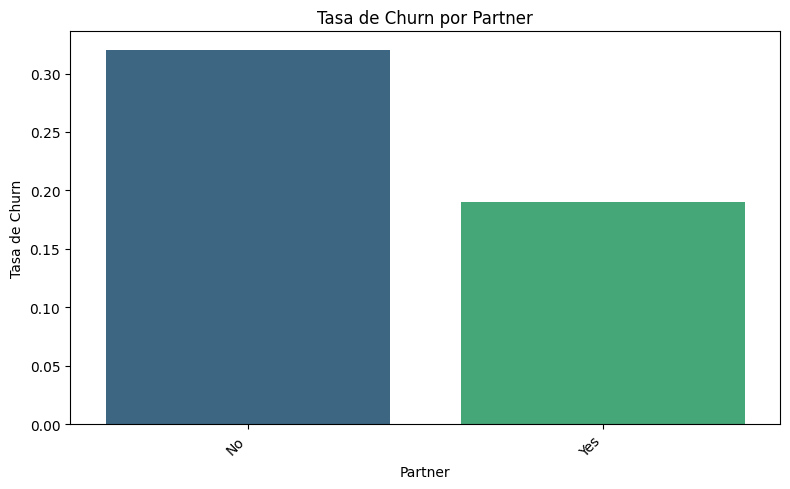


Análisis para: Dependents
Dependents
No     0.303382
Yes    0.149473
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


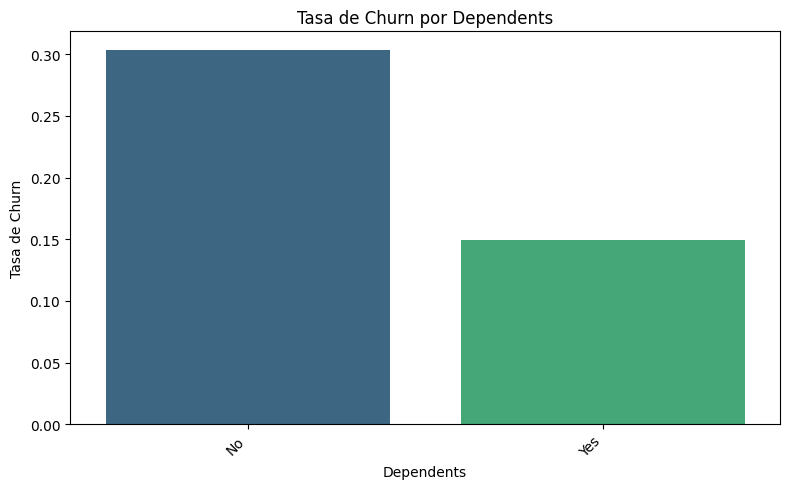

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



Análisis para: PhoneService
PhoneService
Yes    0.258994
No     0.240453
Name: Churn, dtype: float64


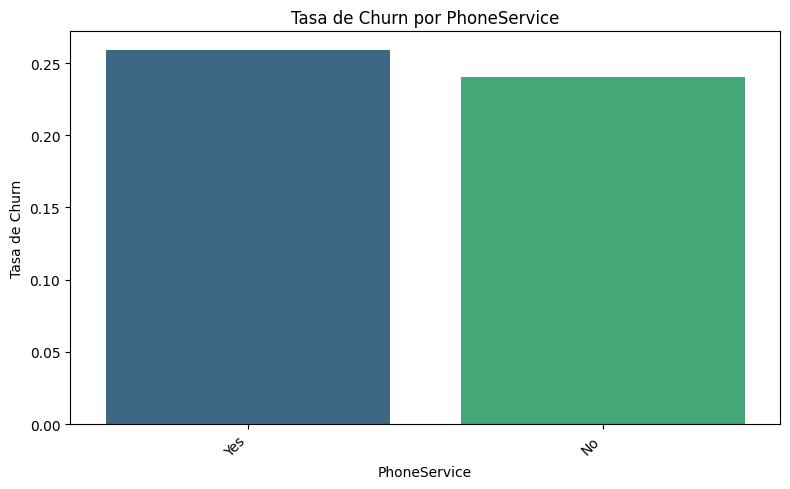


Análisis para: MultipleLines
MultipleLines
Yes                 0.277325
No                  0.242918
No phone service    0.240453
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


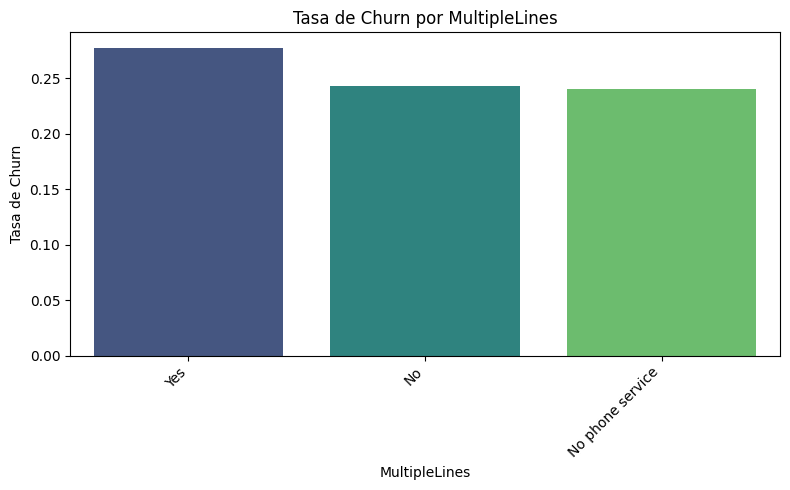

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



Análisis para: InternetService
InternetService
Fiber optic    0.405566
DSL            0.184486
No             0.071474
Name: Churn, dtype: float64


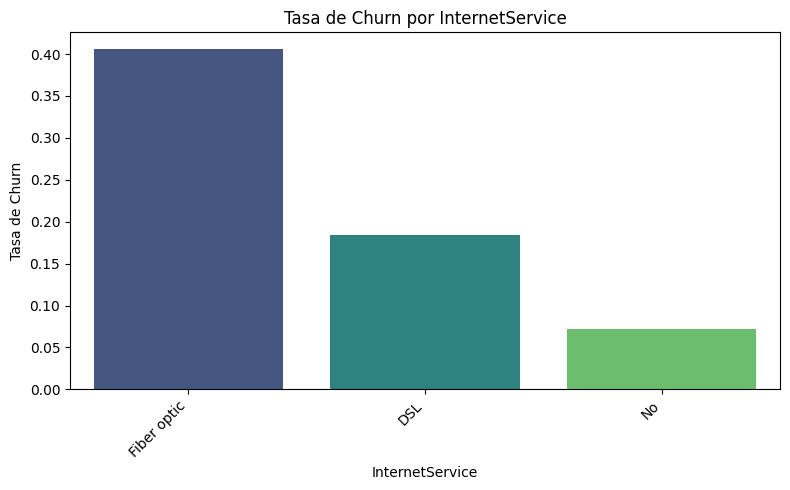

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



Análisis para: OnlineSecurity
OnlineSecurity
No                     0.404933
Yes                    0.141963
No internet service    0.071474
Name: Churn, dtype: float64


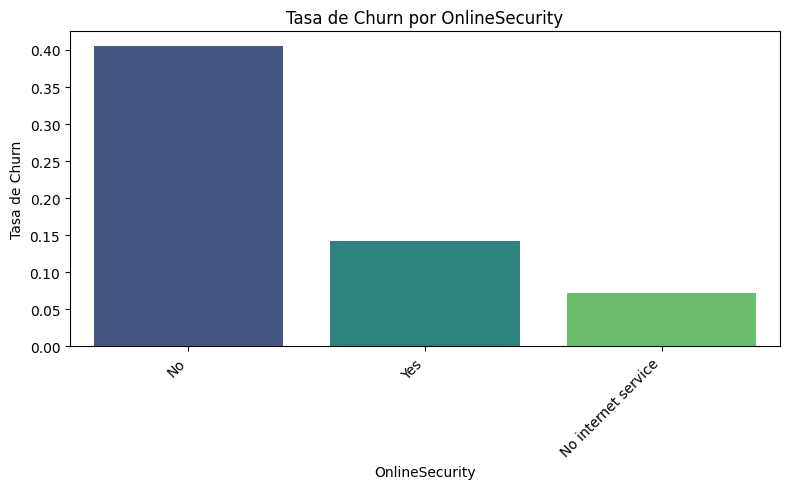


Análisis para: OnlineBackup
OnlineBackup
No                     0.387492
Yes                    0.208866
No internet service    0.071474
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


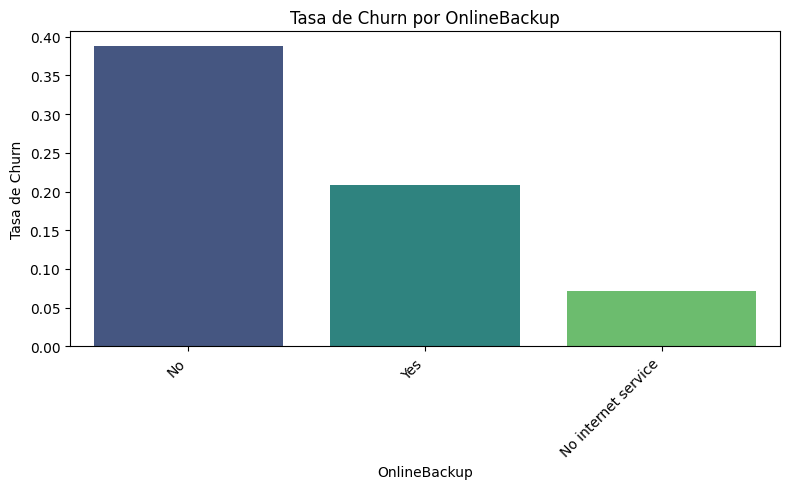

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



Análisis para: DeviceProtection
DeviceProtection
No                     0.379030
Yes                    0.218788
No internet service    0.071474
Name: Churn, dtype: float64


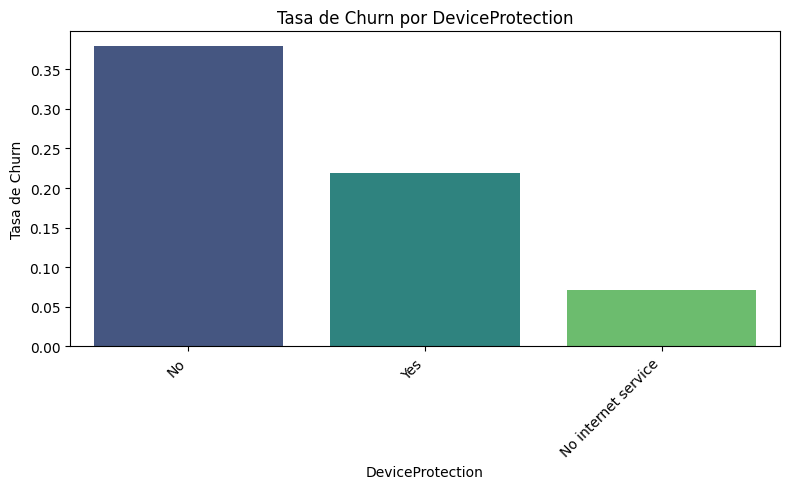

<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')



Análisis para: TechSupport
TechSupport
No                     0.403685
Yes                    0.147338
No internet service    0.071474
Name: Churn, dtype: float64


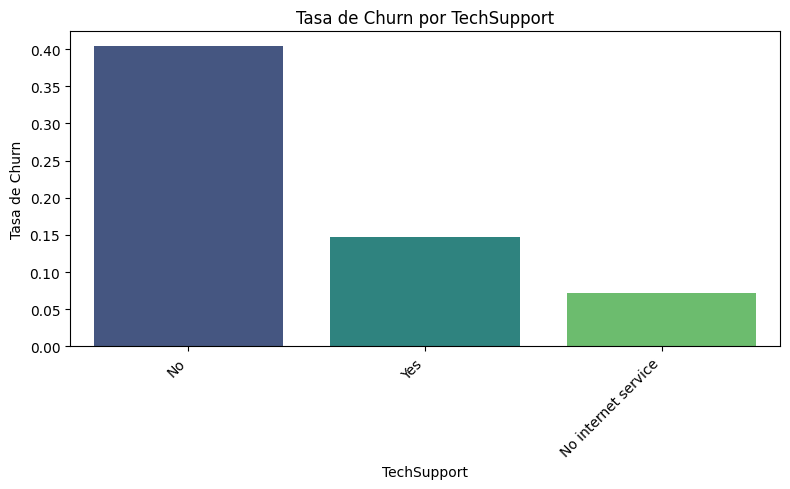


Análisis para: StreamingTV
StreamingTV
No                     0.325276
Yes                    0.291756
No internet service    0.071474
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


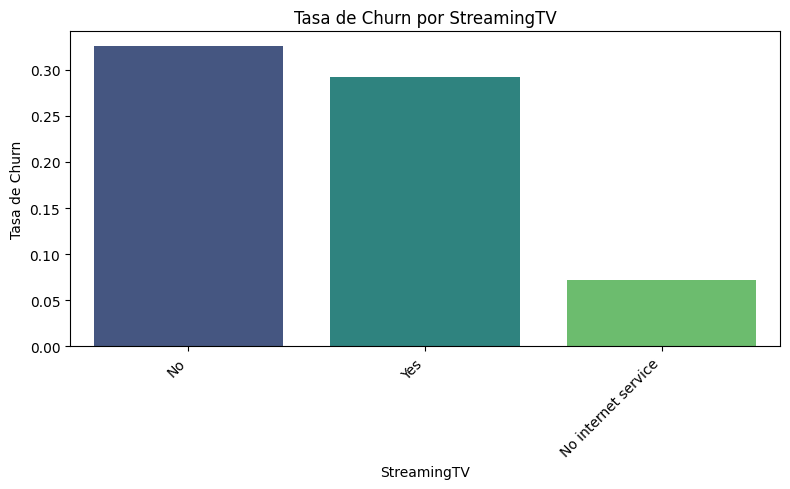


Análisis para: StreamingMovies
StreamingMovies
No                     0.326829
Yes                    0.290483
No internet service    0.071474
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


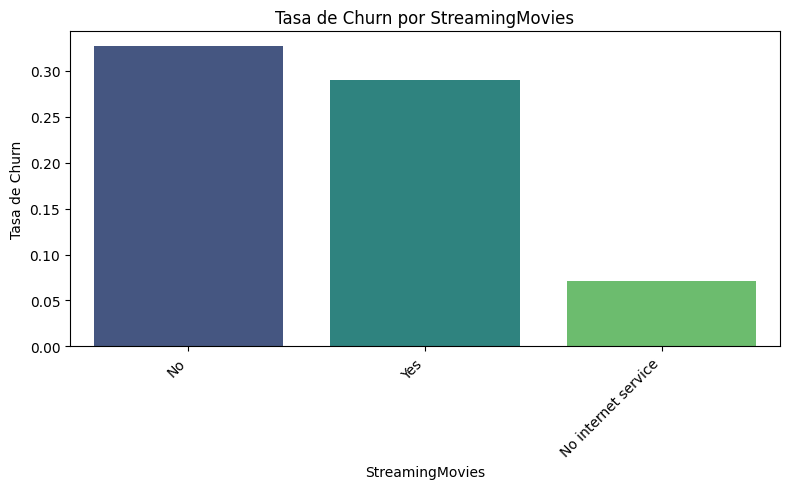


Análisis para: Contract


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


Contract
Month-to-month    0.413233
One year          0.109282
Two year          0.027539
Name: Churn, dtype: float64


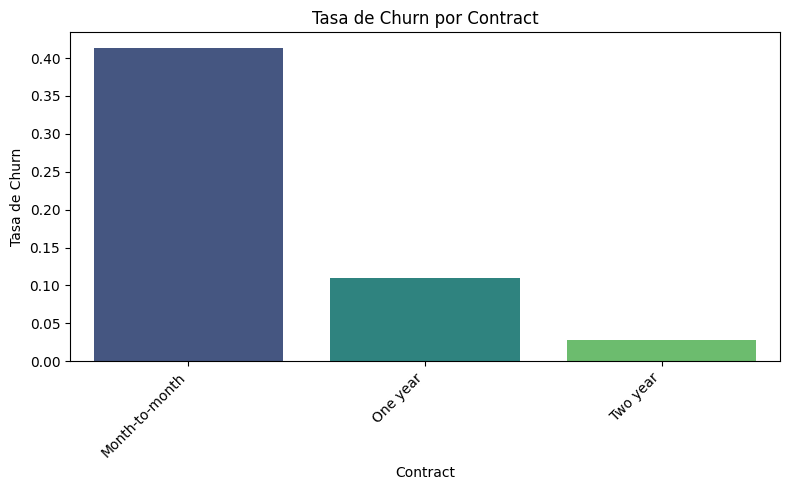


Análisis para: PaperlessBilling


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


PaperlessBilling
Yes    0.324751
No     0.158660
Name: Churn, dtype: float64


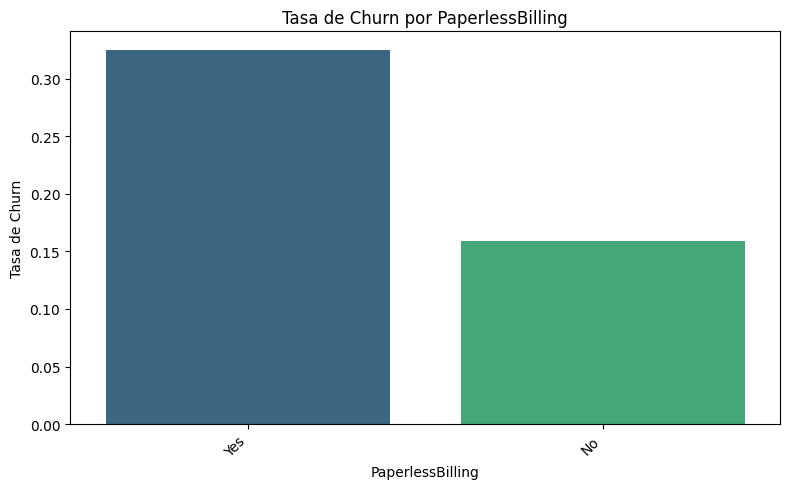


Análisis para: PaymentMethod
PaymentMethod
Electronic check             0.438037
Mailed check                 0.184985
Bank transfer (automatic)    0.162366
Credit card (automatic)      0.147959
Name: Churn, dtype: float64


<ipython-input-21-26f2e40be920>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


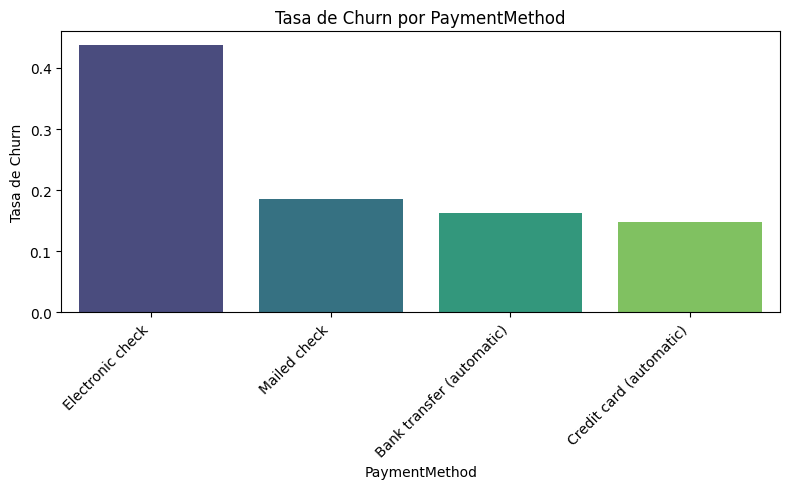


--- Distribución de Variables Numéricas por Churn ---


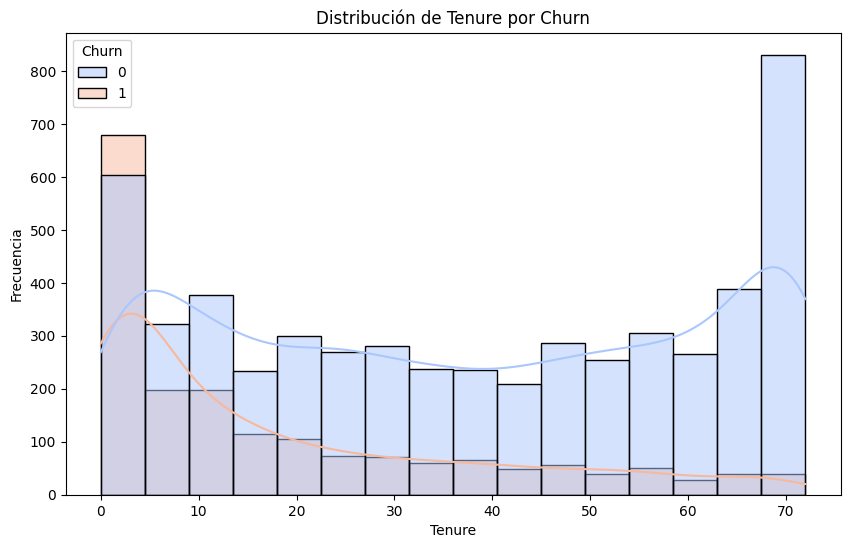

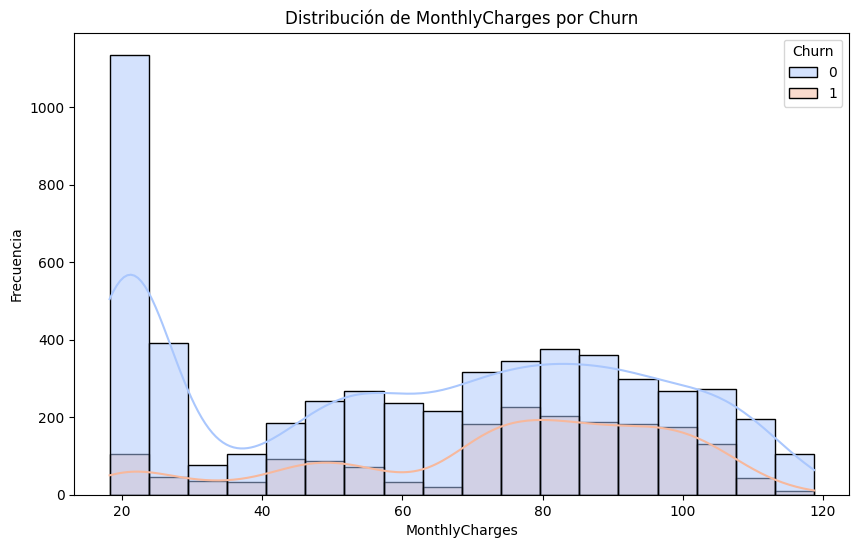

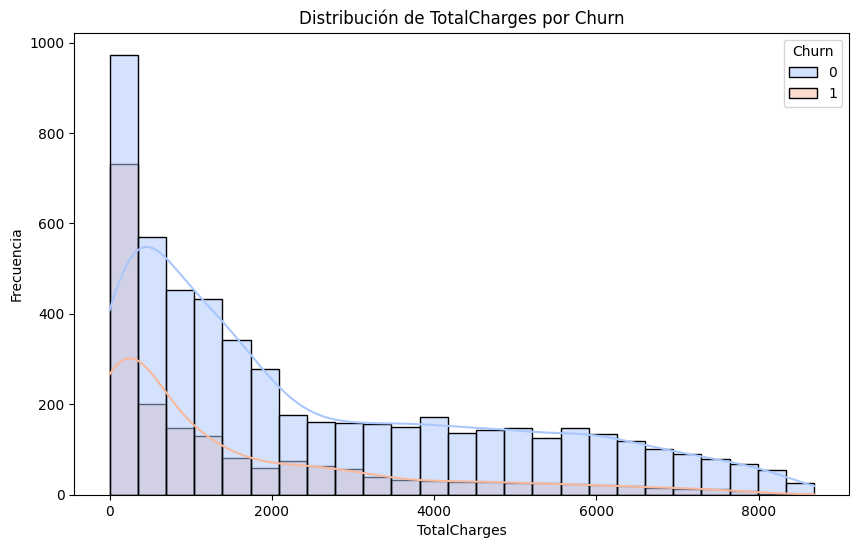


--- Correlación con Churn (variables numéricas) ---
Churn             1.000000
MonthlyCharges    0.189866
TotalCharges     -0.193345
Tenure           -0.344079
Name: Churn, dtype: float64


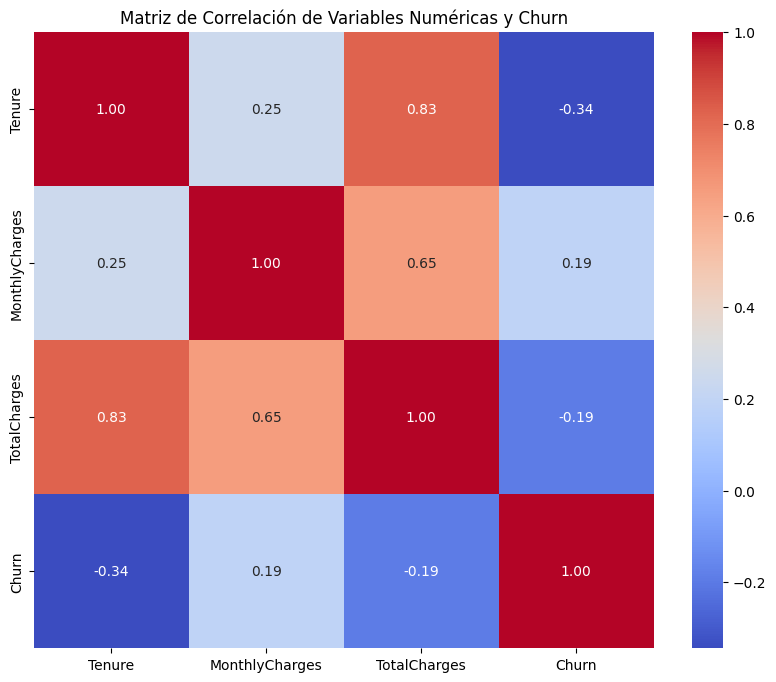


--- Análisis Exploratorio de Datos Completado ---
El DataFrame ha sido limpiado y analizado, listo para el equipo de ciencia de datos.


In [21]:
# --- Análisis Exploratorio de Datos (EDA) ---

print("\n--- Análisis Descriptivo General ---")
print(df.describe())

print("\n--- Distribución de la Variable Objetivo (Churn) ---")
print(df['Churn'].value_counts(normalize=True))

# Análisis de Churn por variables categóricas
categorical_cols = [
    'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

print("\n--- Tasa de Churn por Variables Categóricas ---")
for col in categorical_cols:
    print(f"\nAnálisis para: {col}")
    # Calcula la tasa de churn para cada categoría
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    print(churn_rate)

    # Visualización
    plt.figure(figsize=(8, 5))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
    plt.title(f'Tasa de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Tasa de Churn')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Análisis de Churn por variables numéricas (con distribuciones)
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

print("\n--- Distribución de Variables Numéricas por Churn ---")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Correlación entre variables numéricas y Churn
print("\n--- Correlación con Churn (variables numéricas) ---")
# Solo muestra la correlación de cada variable numérica con 'Churn'
print(df[numerical_cols + ['Churn']].corr()['Churn'].sort_values(ascending=False))

# Matriz de correlación para todas las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Churn')
plt.show()

print("\n--- Análisis Exploratorio de Datos Completado ---")
print("El DataFrame ha sido limpiado y analizado, listo para el equipo de ciencia de datos.")

# **Informe final Análisis de Evasión (Churn) de Clientes en TelecomX**

##Introducción

El objetivo principal de este proyecto es realizar un análisis exhaustivo del fenómeno de la evasión de clientes, comúnmente conocido como "Churn", en la empresa de telecomunicaciones TelecomX. La evasión de clientes representa una pérdida significativa de ingresos y un desafío constante para las empresas de servicios. Al comprender los factores que impulsan a los clientes a cancelar sus servicios, TelecomX podrá desarrollar estrategias de retención más efectivas, optimizar sus servicios y, en última instancia, mejorar la satisfacción y lealtad del cliente.

Este informe detalla el proceso de análisis, desde la extracción y limpieza de los datos, pasando por un análisis exploratorio detallado, hasta la extracción de conclusiones y la formulación de recomendaciones estratégicas para mitigar el churn.

Despues de realizar el análisis exploratorio de datos (EDA) e identificar algunos patrones clave que pueden estar contribuyendo al alto índice de evasión de clientes en Telecom X, presento un resumen de los hallazgos mas relevantes:



### 1. Tasa de abandono General:
Se observó que un porcentaje significativo de clientes está abandonando la empresa, lo cual confirma la preocupación inicial. (El porcentaje exacto dependerá de los datos, pero el df['Churn'].value_counts(normalize=True) en la salida lo mostraría).
### 2. Variables Categóricas y su Relación con el Churn:
#### Tipo de Contrato (Contract):
Los clientes con contratos "Month-to-month" (mes a mes) tienen una tasa de churn considerablemente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que los contratos a largo plazo generan una mayor lealtad.
#### Servicio de Internet (InternetService):
Los clientes con "Fiber optic" (Fibra óptica) presentan una tasa de churn más elevada que los que tienen "DSL" o no tienen servicio de internet. Esto podría indicar problemas con la calidad del servicio de fibra, la satisfacción del cliente o la competencia en este segmento.
#### Servicios Adicionales de Internet:
La ausencia de servicios como OnlineSecurity (Seguridad en línea), TechSupport (Soporte técnico), OnlineBackup (Copia de seguridad en línea) y DeviceProtection (Protección de dispositivos) está asociada con mayores tasas de churn. Los clientes que carecen de estos servicios de valor agregado son más propensos a irse. Esto sugiere que estos servicios retienen a los clientes al brindarles seguridad y conveniencia.
#### Facturación sin Papel (PaperlessBilling):
Los clientes que utilizan la facturación sin papel tienden a tener una tasa de churn ligeramente más alta. Esto podría estar relacionado con el tipo de cliente que prefiere esta opción (quizás más digitalmente activo y propenso a cambiar) o con posibles problemas en la experiencia del usuario con este método de facturación.
#### Método de Pago (PaymentMethod):
El método de pago "Electronic check" (Cheque electrónico) muestra una tasa de churn notablemente superior en comparación con otros métodos como transferencias bancarias o tarjetas de crédito automáticas. Esto podría indicar fricciones en el proceso de pago electrónico o una correlación con un segmento de clientes más volátil.
#### Pareja (Partner) y Dependientes (Dependents):
Los clientes que no tienen pareja o dependientes (No en Partner y Dependents) parecen tener una tasa de churn más alta. Esto sugiere que los hogares con múltiples miembros podrían estar más "anclados" al servicio.
#### Ciudadano Senior (SeniorCitizen):
Los ciudadanos senior (1) tienen una tasa de churn más alta que los no senior (0). Esto podría indicar que este segmento de clientes tiene necesidades diferentes o es más sensible a ciertos factores.
### 3. Variables Numéricas y su Relación con el Churn:
#### Antigüedad (Tenure):
**Existe una clara relación inversa:** los clientes con baja antigüedad (Tenure más baja) son significativamente más propensos a abandonar. Esto es un hallazgo común, ya que los clientes nuevos son más susceptibles a irse si su experiencia inicial no es satisfactoria. Los clientes con mayor antigüedad tienen una lealtad más arraigada.
#### Cargos Mensuales (MonthlyCharges):
Los clientes con cargos mensuales más altos tienden a tener una tasa de churn más elevada. Esto podría indicar que el precio es un factor importante, especialmente si no perciben un valor proporcional al costo.
#### Cargos Totales (TotalCharges):
Esta variable está correlacionada con Tenure (antigüedad). Los clientes con TotalCharges bajos (a menudo relacionados con baja antigüedad) tienen una mayor propensión al churn. Los clientes con TotalCharges altos (que implica mayor antigüedad) tienen una menor propensión a irse.
# Conclusiones Preliminares para el Equipo de Ciencia de Datos:
Basándonos en este análisis exploratorio, las principales áreas donde Telecom X debería enfocarse para determinar la causa de la evasión de clientes son:

#### Clientes de Corta Antigüedad y con Contratos "Mes a Mes":
Son el grupo de mayor riesgo. Se necesita investigar la experiencia de incorporación, la satisfacción inicial y las estrategias de retención para este segmento.
Problemas con el Servicio de Fibra Óptica: La alta tasa de churn en este servicio sugiere que se deben revisar la calidad, el rendimiento y el soporte asociado a la fibra óptica.
#### Falta de Servicios de Seguridad/Soporte:
Los clientes que no contratan OnlineSecurity, TechSupport, OnlineBackup y DeviceProtection son más vulnerables. Promocionar o incluir estos servicios podría mejorar la retención.
#### Método de Pago "Cheque Electrónico":
Analizar la experiencia del usuario con este método de pago y si hay problemas de fricción que contribuyan al churn.
#### Relación Precio-Valor:
Los clientes con cargos mensuales altos y que se van podrían estar buscando un mejor valor. Se deben evaluar las ofertas y la percepción del valor del servicio.
Estos hallazgos proporcionan una base sólida para que el equipo de ciencia de datos profundice con modelos predictivos y determine con mayor precisión los factores impulsores del churn.
Entregamos El DataFrame df ya limpio y transformado, listo para ser utilizado por el Equipo de Ciencia de Datos